# Import Packages

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

# Read the Data and its Descriptive Statistics

In [13]:
tracks = pd.read_csv("data/processed/tracks.csv")
tracks.head()
tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,artists_popularity,release_year
count,102433.00000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.000000,102433.00000,102433.000000
mean,40.04643,0.044896,0.099851,0.613267,0.650104,0.483473,0.824242,0.618775,0.124412,0.300207,0.071609,0.200381,0.522598,0.556447,0.786307,0.025398,0.55168,0.468743
std,18.58119,0.023697,0.299802,0.157368,0.217551,0.324737,0.069880,0.485690,0.131802,0.296113,0.219458,0.174287,0.249565,0.131358,0.071208,0.082945,0.18492,0.299653
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,31.00000,0.036693,0.000000,0.511675,0.507000,0.181818,0.798146,0.000000,0.051603,0.037149,0.000000,0.096800,0.322000,0.453569,0.800000,0.000295,0.43000,0.230769
50%,42.00000,0.042857,0.000000,0.621320,0.677000,0.454545,0.837834,1.000000,0.070229,0.193775,0.000002,0.128000,0.517000,0.558894,0.800000,0.001833,0.56000,0.461538
75%,53.00000,0.050113,0.000000,0.726904,0.826000,0.818182,0.867753,1.000000,0.128092,0.519076,0.000569,0.253000,0.727000,0.636032,0.800000,0.010898,0.67000,0.692308
max,99.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# Correlation between each Feature

In [15]:
tracks.corr().head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,artists_popularity,release_year
popularity,1.000000,-0.065920,0.150017,0.119296,-0.070457,-0.005264,0.108960,0.000593,0.044204,0.052401,-0.288239,-0.098858,0.000040,-0.018959,0.005241,0.164017,0.571956,0.142030
duration_ms,-0.065920,1.000000,-0.059621,-0.114772,-0.001986,0.007728,-0.016157,0.000700,-0.081549,-0.023170,0.078503,0.027302,-0.145982,0.004946,-0.005045,-0.012388,-0.069877,-0.090019
explicit,0.150017,-0.059621,1.000000,0.176007,0.034774,0.004416,0.032236,-0.066900,0.391287,-0.070548,-0.075058,-0.018085,-0.026680,-0.020083,0.036698,0.055407,0.150094,0.183912
danceability,0.119296,-0.114772,0.176007,1.000000,0.113467,0.014786,0.169884,-0.078088,0.190556,-0.122688,-0.131754,-0.158037,0.459116,-0.121616,0.151034,0.039162,0.055279,0.136686
energy,-0.070457,-0.001986,0.034774,0.113467,1.000000,0.031165,0.717594,-0.088719,0.122986,-0.684878,-0.031159,0.173753,0.367705,0.178128,0.159640,0.012704,0.008986,-0.052528


# Heatmap to Showcase the Correlation between the Features

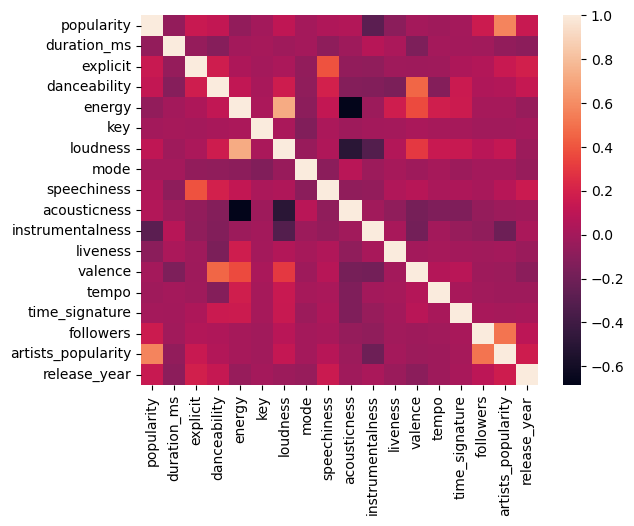

In [17]:
sns.heatmap(tracks.corr(), annot=False);

# Popularity Feature and its Correlation for each Respective Feature

In [4]:
tracks.corr()[['popularity']]

,popularity
popularity,1.000000
duration_ms,-0.065920
explicit,0.150017
danceability,0.119296
energy,-0.070457
key,-0.005264
loudness,0.108960
mode,0.000593
speechiness,0.044204
acousticness,0.052401


# Drop Features with no-to-little Correlation and create our X and y Arrays

In [20]:
#X = tracks.drop(columns=['popularity']).to_numpy()
X = tracks.drop(columns=['popularity','key','mode','valence','time_signature']).to_numpy()
y = tracks.loc[:, 'popularity'].to_numpy()

# Split our Dataset into Training and Test Sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create our Linear Regression Model and fit our Training Sets

In [8]:
linear_model = lm.LinearRegression()
linear_model.fit(X_train, y_train)

# Predict our y_pred values using our linear model with our X_test set

In [22]:
y_pred = linear_model.predict(X_test)

# Calculate our Train and Test Set RMSE

In [23]:
train_rmse = np.sqrt(np.mean((y_train - linear_model.predict(X_train)) ** 2))
test_rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

In [24]:
train_rmse, test_rmse

(14.329901505832153, 14.441436976656012)

# Plot our Predictions vs Observations and our Residual Plot

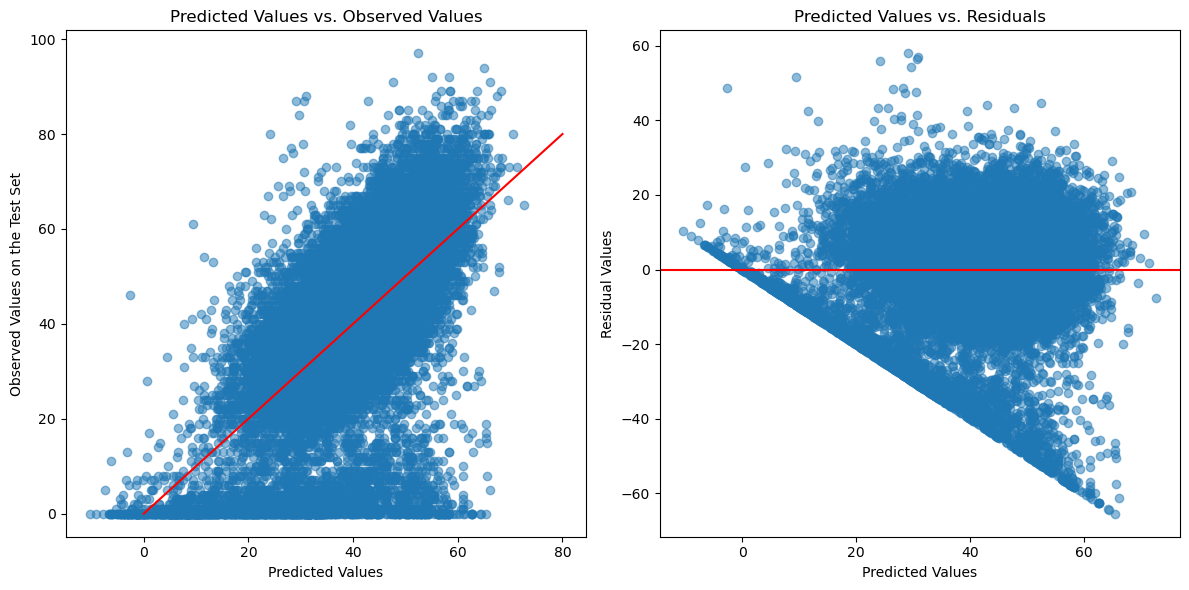

In [25]:
plt.figure(figsize=(12,6))     

plt.subplot(121)                
# (1) predictions vs observations
plt.scatter(y_pred, y_test, alpha=0.5)
plt.plot(np.linspace(0,80),np.linspace(0,80), color='r')
plt.ylabel("Observed Values on the Test Set")
plt.xlabel("Predicted Values")
plt.title("Predicted Values vs. Observed Values")

plt.subplot(122)               
# (2) residual plot
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.axhline(y = 0, color='r');
plt.ylabel("Residual Values")
plt.xlabel("Predicted Values")
plt.title("Predicted Values vs. Residuals")
# NOTE: For multiple linear regression, I'm using the predicted values vs. residuals for the residual plot.
# Shows a pattern, so may not be a good residual plot (should have a similar vertical spread)

plt.tight_layout() # Adjust the padding between and around subplots.


# Calculate our R2 Score

In [29]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.39604577636850735